# CZ4052 - Cloud Computing Assignment 2

Study Google Pagerank Algorithm and Mapreduce (Mapper & Reducer functions). Your resport should have a section discussing how you explore tuning problem parameters (e.g., teleportation probability, web graph matrix M, distribution vector E etc) and a section of numerical examples and experiments of Google Pagerank Algorithm implemented in your preferred programming language. Start with the illustrative example of four-webpages on Slide 53 of Lecture 7 and then consider larger graphs. Validate that the Pagerank Algorithm converges numerically to the closed form solutions (two closed forms were given in Lecture). See a reference in Matlab: https://www.mathworks.com/help/matlab/math/use-page-rank-algorithm-to-rank-websites.html. Lastly, describe how your Pagerank may be implemented in a parallel programming framework like MapReduce/Hadoop (i.e., Mapper and Reducer Functions).


In [2]:
import common.pagerank as pr
import common.plotting_utils as plt
from common.utils import generate_web_graph, get_transition_matrix

import numpy as np

## Lecture Note Examples


### Simplified Pagerank Algorithm


#### Example without Spider Traps:


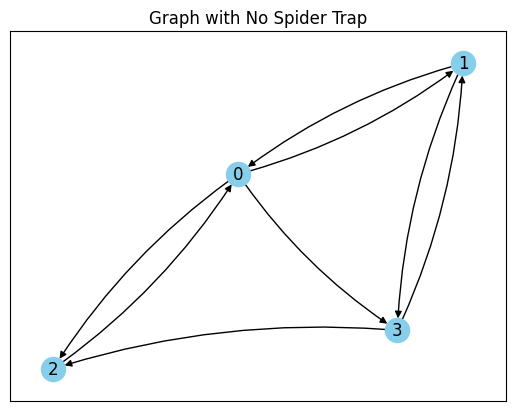

In [3]:
A = [[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [1, 1, 0, 0]]

M = get_transition_matrix(A)


plt.plot_directed_graph(A, "Graph with No Spider Trap")

Converged after 43 iterations.
Final result:
 [0.33333333 0.22222222 0.22222222 0.22222222]


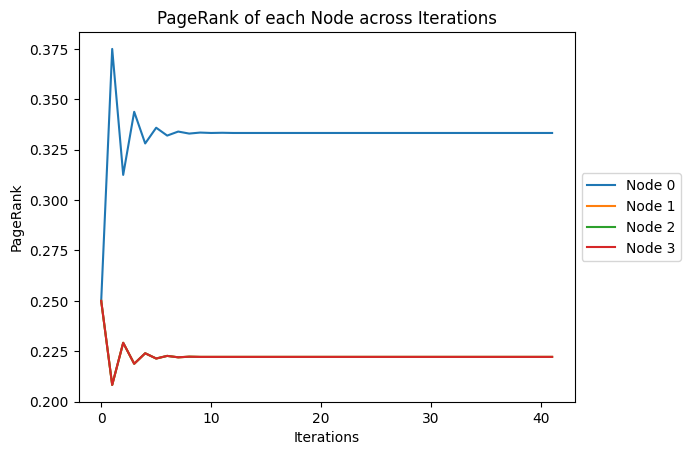

In [4]:
rank_vector, r_history = pr.simplified_pagerank(
    M, len(M)
)  # Output should be [1/3, 2/9. 2/9, 2/9]
plt.plot_r_history(r_history)

#### Spider Trap Example:

Without teleportation, we are unable to handle spidertraps. All pagerank is allocated to the third node in this example as surfers are not able to get out of third node.

Example can be found oin Lecture 7 Page 53


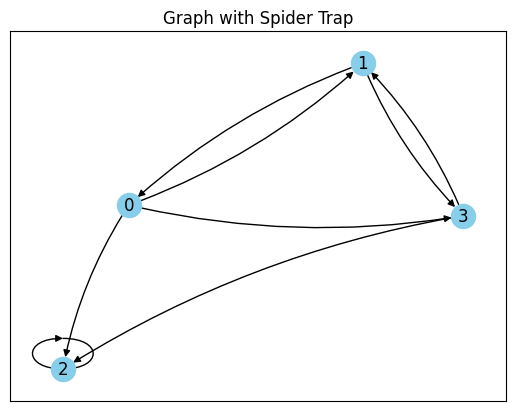

In [5]:
A = [[0, 1, 0, 0], [1, 0, 0, 1], [1, 0, 1, 1], [1, 1, 0, 0]]
M = get_transition_matrix(A)
plt.plot_directed_graph(A, "Graph with Spider Trap")

Converged after 93 iterations.
Final result:
 [3.14179570e-14 4.57893822e-14 1.00000000e+00 4.57893822e-14]


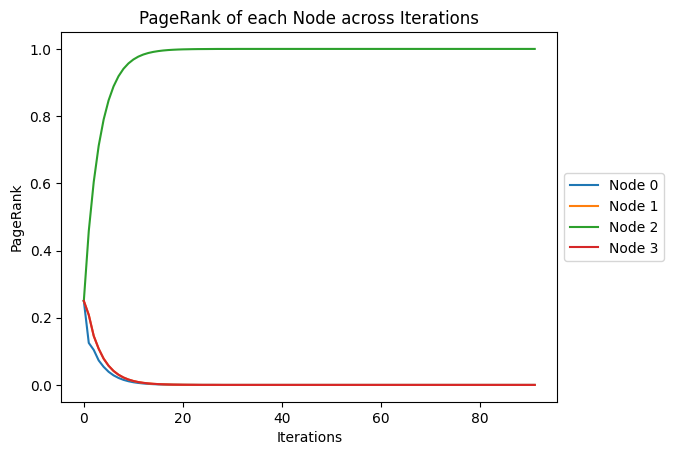

In [6]:
rank_vector, r_history = pr.simplified_pagerank(M, len(M))
plt.plot_r_history(r_history)

### Modified PageRank Algorithm with Teleportation


#### Spider Trap Example:

We will use the same adjacency matrix that contains a spider trap at the third node. beta = 0.8


No Dead Ends
Converged after 55 iterations.
Sum of PageRank: 0.9999999999999998


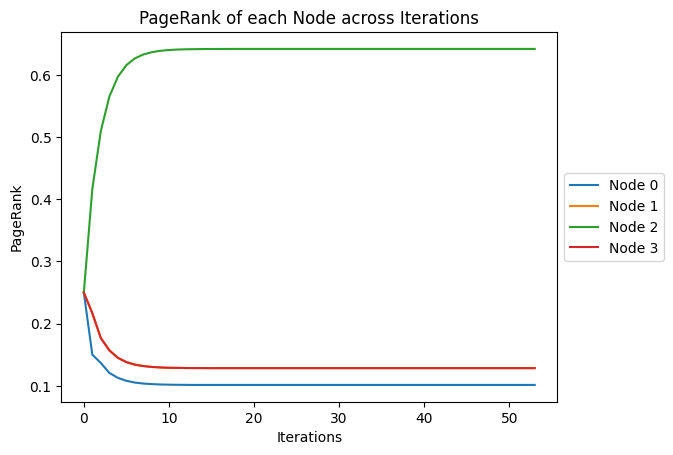

In [7]:
A = [[0, 1, 0, 0], [1, 0, 0, 1], [1, 0, 1, 1], [1, 1, 0, 0]]
M = get_transition_matrix(A)

rank_vector, r_history = pr.pagerank(M, len(A), beta=0.8)

plt.plot_r_history(r_history)

In [8]:
rank_vector, r_history = pr.modified_pagerank(
    M, len(A), beta=0.8
)  # Output: [0.10135135 0.12837838 0.64189189 0.12837838]
print(f"CLOSED FORM:\n{pr.closed_form_pagerank(M, len(A), beta=0.8)}")
# plt.plot_r_history(r_history)

Initial Rank Vector:
[[0.25]
 [0.25]
 [0.25]
 [0.25]]
Converged after 55 iterations.
Final result:
 [0.10135135 0.12837838 0.64189189 0.12837838]
No Dead Ends
CLOSED FORM:
[0.10135135 0.12837838 0.64189189 0.12837838]


### Dead End Example:

When a dead end is present (a node with no outlinks), our pagerank with teleportation fails. We need to be able to remove dead ends by teleporting (with equal probability) the surfer to another node.


/Users/dion/Github/Y4_Projects/Sem 2/Cloud Computing/CZ4052-Cloud-Computing-Assignment-2/common/utils.py:37: RuntimeWarning: invalid value encountered in divide
  M[:, j] = M[:, j] / s[j]


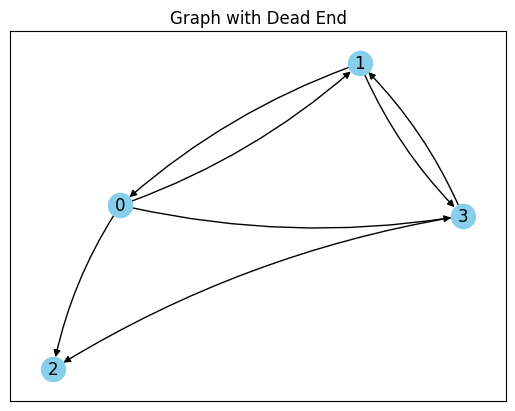

In [9]:
A = [[0, 1, 0, 0], [1, 0, 0, 1], [1, 0, 0, 1], [1, 1, 0, 0]]
M = get_transition_matrix(A)
plt.plot_directed_graph(A, "Graph with Dead End")

Dead Ends found!
New Transition Matrix:
[[0.         0.5        0.25       0.        ]
 [0.33333333 0.         0.25       0.5       ]
 [0.33333333 0.         0.25       0.5       ]
 [0.33333333 0.5        0.25       0.        ]]
Initial Rank Vector:
[[0.25]
 [0.25]
 [0.25]
 [0.25]]
Converged after 19 iterations.
Final result:
 [0.20833333 0.26388889 0.26388889 0.26388889]


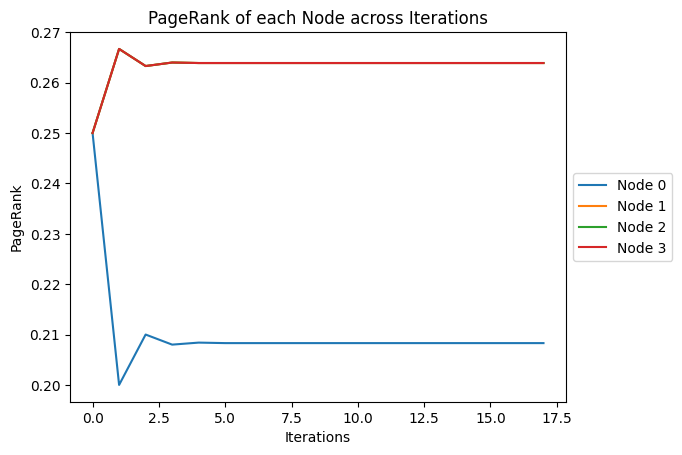

In [10]:
# print(f"M:\n{M}")
# print(f"NEW M:\n{pr.remove_dead_ends(M)}")
rank_vector, r_history = pr.dead_end_pagerank(
    M, len(A), beta=0.8
)  # Output: [0.10135135 0.12837838 0.64189189 0.12837838]
plt.plot_r_history(r_history)

## Generated Web Graphs


We will use pagerank() from now on. This function is a combination of both modified_pagerank() and dead_end_pagerank()


Generated Web Graph Information:
Number of Nodes: 25
Number of Edges: 463


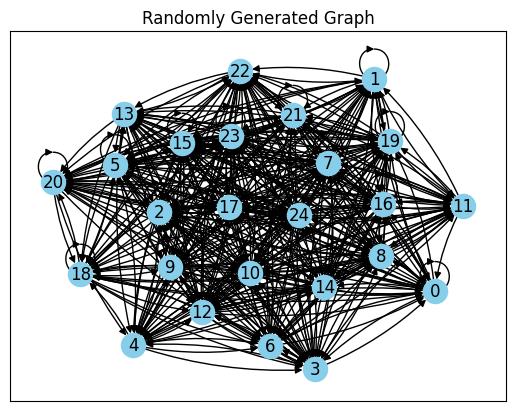

In [11]:
A = generate_web_graph(n=25, prob_1=0.75)
plt.plot_directed_graph(A, "Randomly Generated Graph")

# rank_vector, r_history = pr.dead_end_pagerank(M, len(A), beta=0.8)
# print(sum(rank_vector))
# # plt.plot_r_history(r_history)

### Experiments with varying beta Value


In [19]:
import time

beta_values = [i / 100.0 for i in range(50, 96, 5)]
A = generate_web_graph(n=1000, prob_1=0.75)
M = get_transition_matrix(A)

for beta in beta_values:
    print(f"beta: {beta}")
    start_time = time.time()
    iter_r, iter_r_hist = pr.pagerank(M, len(A), beta=beta)
    end_time = time.time()
    closed_form_r = pr.closed_form_pagerank(M, len(A), beta=beta)
    pr.iter_vs_closed(iter_r, closed_form_r)
    print(f"Time Taken: {(end_time-start_time)*1000:.5f}")
    print()

Generated Web Graph Information:
Number of Nodes: 1000
Number of Edges: 749605
beta: 0.5
No Dead Ends
Converged after 7 iterations.
Sum of PageRank: 0.9999999999999997
No Dead Ends
Arrays are almost equal.
Time Taken: 5.35607

beta: 0.55
No Dead Ends
Converged after 7 iterations.
Sum of PageRank: 1.0000000000000002
No Dead Ends
Arrays are almost equal.
Time Taken: 5.30624

beta: 0.6
No Dead Ends
Converged after 7 iterations.
Sum of PageRank: 0.9999999999999988
No Dead Ends
Arrays are almost equal.
Time Taken: 6.89101

beta: 0.65
No Dead Ends
Converged after 7 iterations.
Sum of PageRank: 0.9999999999999986
No Dead Ends
Arrays are almost equal.
Time Taken: 4.72713

beta: 0.7
No Dead Ends
Converged after 7 iterations.
Sum of PageRank: 1.0000000000000009
No Dead Ends
Arrays are almost equal.
Time Taken: 2.90203

beta: 0.75
No Dead Ends
Converged after 7 iterations.
Sum of PageRank: 1.0000000000000004
No Dead Ends
Arrays are almost equal.
Time Taken: 6.00410

beta: 0.8
No Dead Ends
Converg

### Experiments with graph sizes

In [ ]:
nodes_list = [20000, 22000, 24000, 26000, 28000, 30000]

for node in nodes_list:
    A = generate_web_graph(n=node, prob_1=0.75)
    M = get_transition_matrix(A)
    start_time = time.time()
    iter_r, iter_r_hist = pr.pagerank(M, len(A), beta=0.85)
    end_time = time.time()
    closed_form_r = pr.closed_form_pagerank(M, len(A), beta=0.85)
    pr.iter_vs_closed(iter_r, closed_form_r)
    print(f"Time Taken: {(end_time-start_time)*1000:.5f}")
    print()